![](https://cdn.shopify.com/s/files/1/0053/6513/7472/products/newyorkcitysunset911.jpg?v=1544036357)
([Image Source](https://gettyphotography.com/products/new-york-city-empire-state-building-sunset-911))
# Ackowlegement 
This Notebook would not have been possible without the fantastic dataset provided by [@josephassaker](https://www.kaggle.com/josephassaker). When I explained that I was using his dataset and would stand to benefit from a revised version, he was kind enough to promptly update his dataset (which previously contained entries upto 19-01-2021) to include data upto the current date. If you haven't already, I strongly encourage you to upvote his dataset [here](https://www.kaggle.com/josephassaker/covid19-global-dataset). 


# Introduction

It has been over a full year since we started this difficult battle against Covid-19 and it has cost us dearly. These fast-spreading microscopic creatures that are too small to be even be seen with the naked eye have somehow shaken the entire world and changed life as we know it. 

People all over the world are racing against the clock to fight this pandemic. We, the bright minds of Kaggle can do our part by using our skills to generate powerful insight that can make the lives of those affected a little better. 

Every day, there's an abundance of data being made publicly available on Kaggle, each one containing different statistics surrounding the Covid-19 pandemic. The goal in this notebook, is to bring two such datasets together and generate a holistic view on how we, as a species have been fighting this virus. 

I will update it often to make sure it contains the most relevant information. Feel free to leave any ideas or links to other datasets and notebooks that you feel would benefit this notebook.

If you like this notebook and the approach, an **upvote** would be massively encouraging! Cheers. 

## Technology Stack
In this analysis, I used python as the primary programming language because of its rich palette of tools that make data analysis a cinch. Some of the python packages I used are:
1. Plotly is an extremely versatile library of tools for generating interactive plots that are easy to interpret and customise
2. Numpy is a popular library used for array manipulation and vector operations. It is used extensively across python projects that require scientific computing.
3. Pandas is another library for data science that is just as popular as numpy. It provides easy to use data structures and functions to manipulate structured data.


These tools are well documented and come with several examples that make it easy to start using them. You can check out the linked documentation pages for more information.

In [33]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [34]:
# load data
df = pd.read_csv('../AB_NYC_2019.csv')

# Data Cleaning

The most important step to take before we get started geenrating any kind of information from all these data sources, it is first important to clean our data and make sure that the datasets are compatible with each other. Since most of the data is divided on a country-by-country basis, we must make sure that all the country names have the same formatting. 

For instance, "United States of America" may be written as "USA", "United Kingdom" as "UK" and so on. We will explore this problem and others in this section. We will prioritize only those countries for which vaccination data is available since most countries have either not yet started vaccinations or do not yet have sufficiently available public data.

## Standardize Country Names

### Steps followed:
- Identify the differences 
- Plan on how to unify them 
- Implement in code 

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

In [10]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [11]:
df['room_type'].value_counts()  #remove Shared room for the hypothesis

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [12]:
print('number of unique host: ', len(df['host_id'].unique()))
df['host_id'].value_counts()

number of unique host:  37457


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [13]:
# number of neighbourhood groups
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

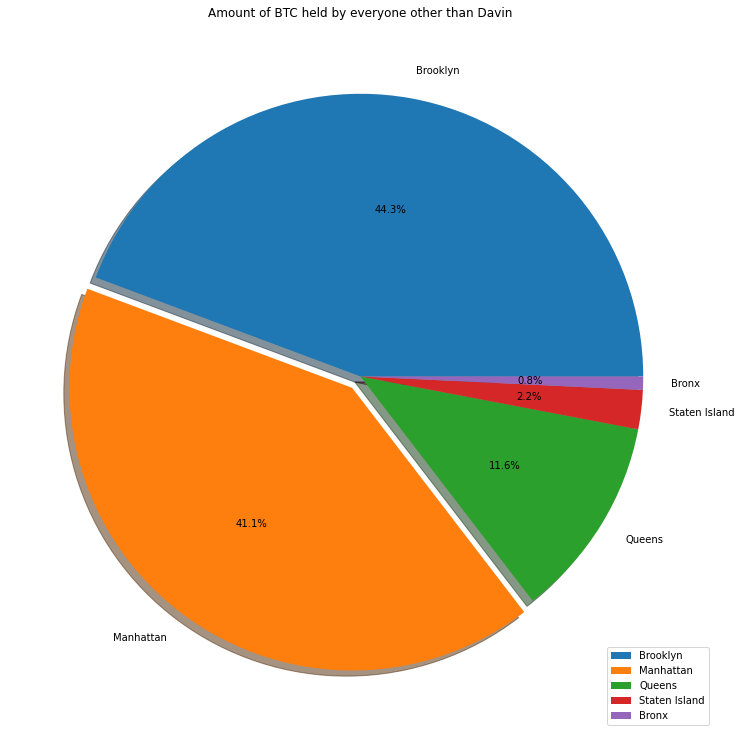

In [14]:


fig, axes = plt.subplots(figsize=(14,13))
axes.set(title="Amount of BTC held by everyone other than Davin")
axes.pie(df['neighbourhood_group'].value_counts(), labels=df["neighbourhood_group"].unique(),explode=[0,0.05,0,0,0],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

In [15]:
# number of different neighbourhood
len(df['neighbourhood'].unique())

221

In [16]:
#df.groupby(['neighbourhood'])['neighbourhood'].unique()
#create a chart for that

In [17]:
# number of room types
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

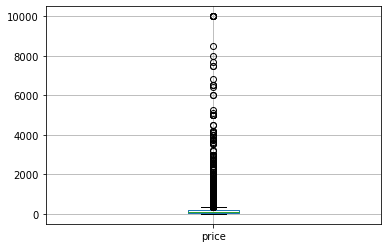

In [19]:
df[['price']].boxplot()

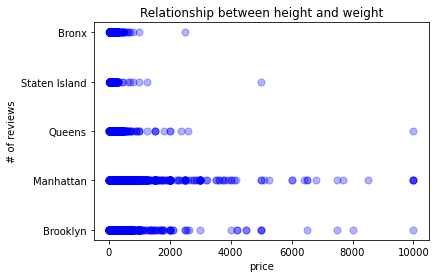

In [20]:
x = df['price'].values
y = df['neighbourhood_group'].values

fig, ax = plt.subplots()
ax.scatter(x,y, s=50, c='b', alpha=0.3)
ax.set_xlabel('price')
ax.set_ylabel('# of reviews')
ax.set_title('Relationship between height and weight')
plt.show()

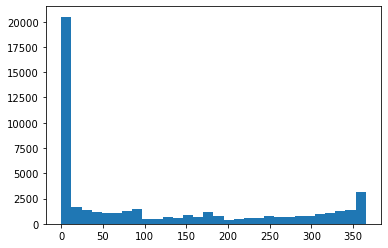

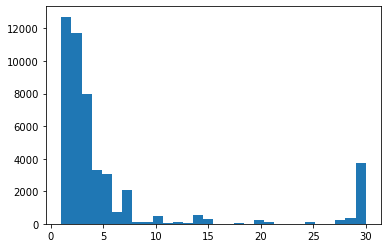

In [21]:
x = df['availability_365']
plt.hist(x, bins = 30)
plt.show()

#most listings are avaliable short-term (more than 2 weeks)

plt.hist(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins = 30)
plt.show()

# most books are for 1-2-3 days minimum

In [22]:
import seaborn as sns

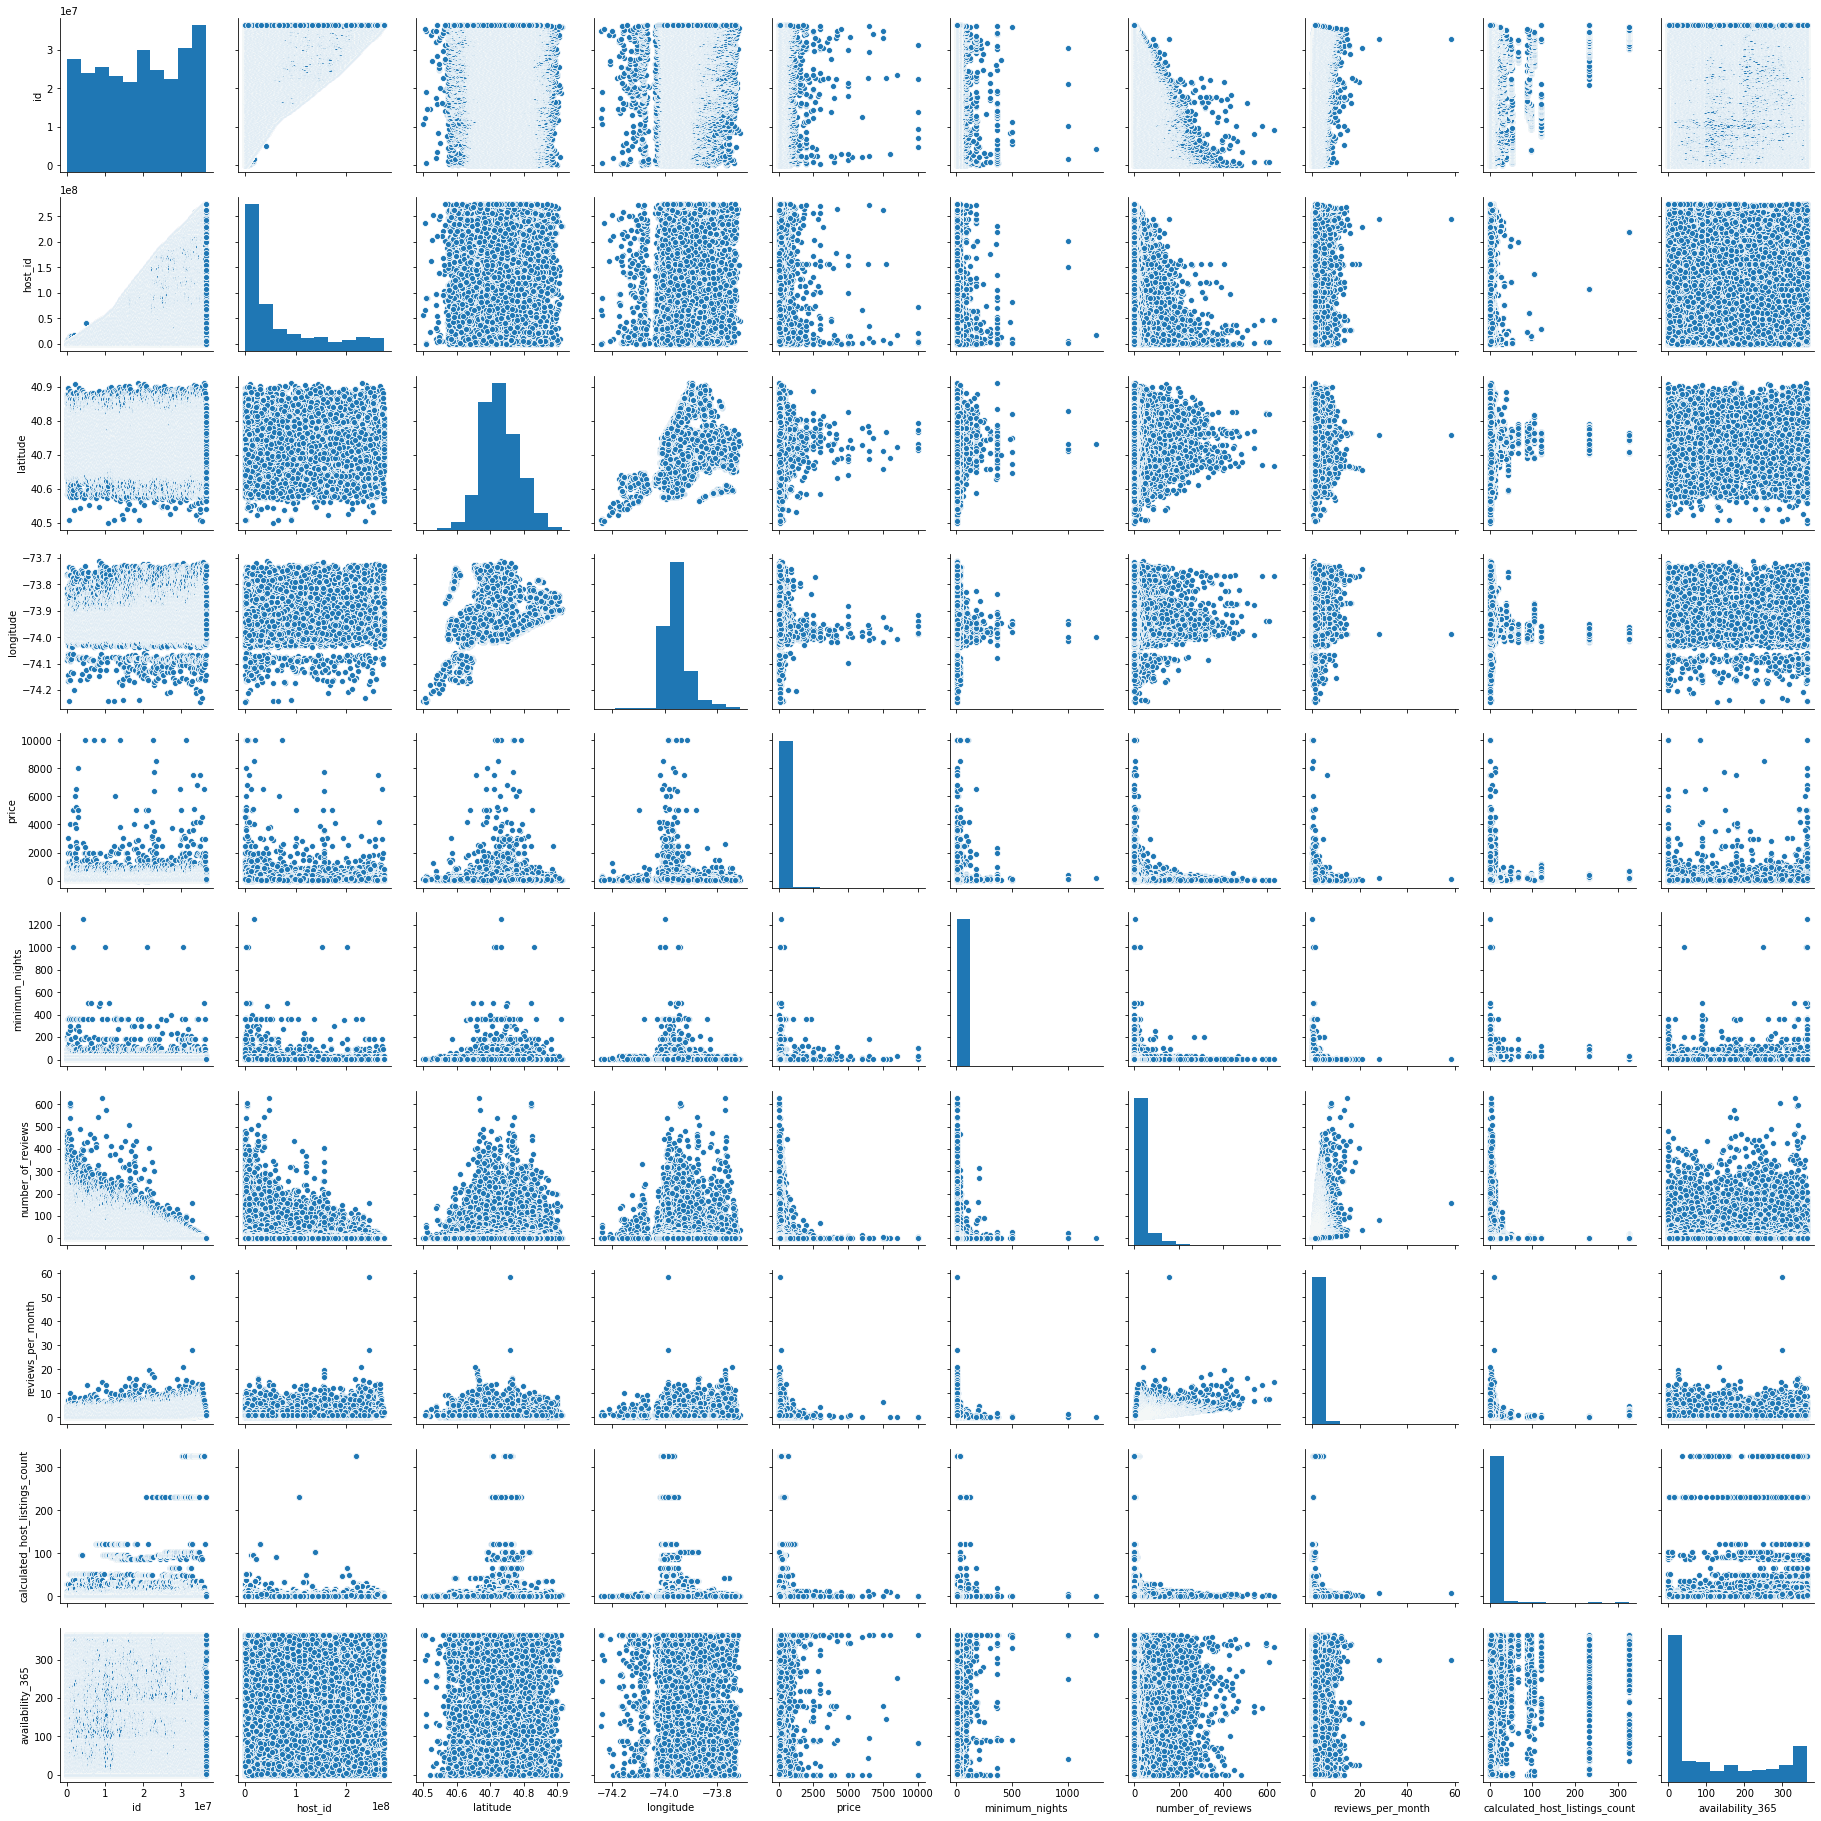

In [23]:
sns.pairplot(df)

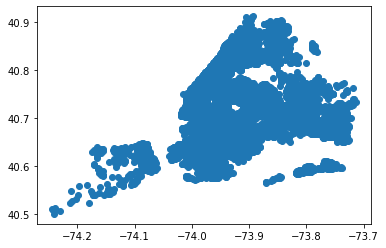

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'], df['latitude'])
plt.show()

Aibnb Listing Distribution on a Heatmap

In [25]:

data = folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(data)
display(data)

#The highest Density areas are marked in red and lowest density areas are marked in blue color

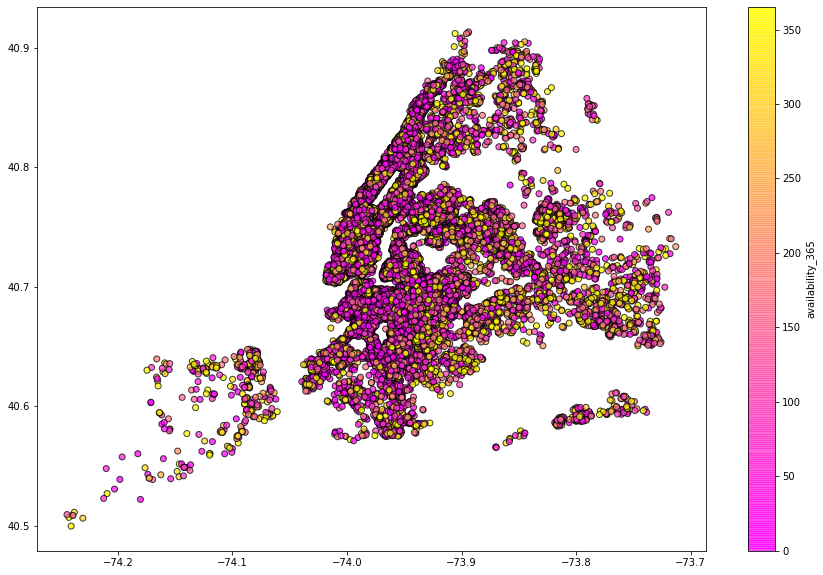

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

#The Yellow color on the map shows the places which have more availability throughout the year.

<Figure size 720x432 with 0 Axes>

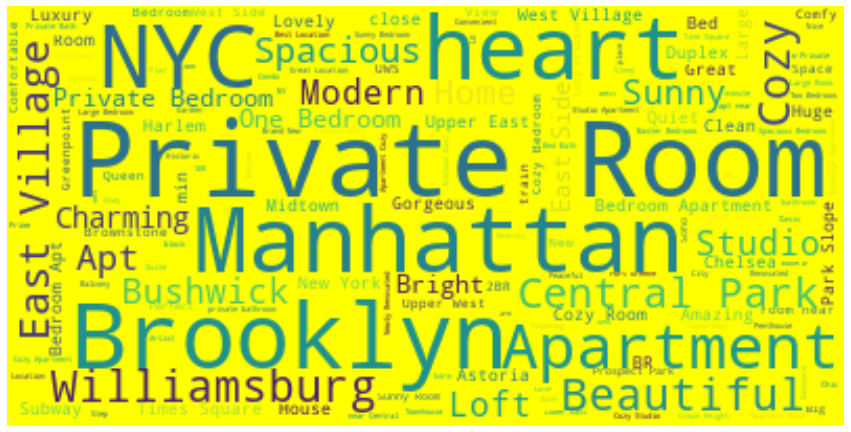

In [39]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()